# Socrata API


For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt



In [22]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

response = requests.get(endpoint)

In [23]:
response

<Response [200]>

In [24]:
result = response.json()
df=pd.DataFrame(result)

In [31]:
df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [32]:
result[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [34]:
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [35]:
fire_2016 = df[(df['query_text'] == 'fire') & (df['year'] == '2016')]
print(fire_2016)

      month_name  year query_count query_text month
12040    January  2016          19       fire   NaN
12938   February  2016          35       fire   NaN
13353      March  2016          32       fire   NaN
13636      April  2016          26       fire   NaN
14448        May  2016          24       fire   NaN
14950       June  2016          31       fire   NaN
15208       July  2016          24       fire   NaN
15748     August  2016          47       fire   NaN
15987  September  2016          36       fire   NaN
16765    October  2016          38       fire   NaN
17411   November  2016          32       fire   NaN
17692   December  2016          38       fire   NaN


#### Questions  

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [39]:
fire_2016 = df[(df['query_text'] == 'fire') & (df['year'] == '2016')]


sorted_fire_2016 = fire_2016.sort_values(by='query_count', ascending=False)


month_with_most_searches = sorted_fire_2016.iloc[0]['month_name']

print(f"The month with the most 'fire' searches in 2016 was {month_with_most_searches}.")


The month with the most 'fire' searches in 2016 was August.



2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [66]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count%20%3E%20%27100%27'

response2 = requests.get(endpoint2)
response2

<Response [200]>

In [67]:
params2 = {
    '$limit' : 100000,
    '$where' : 'query_count > 100'
}

response2 = requests.get(endpoint , params=params2)
response2
len(response2.json())

1262

There was a 1262 returns based on the given API request

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [70]:

endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count%20%3E%20%27100%27'
response3 = requests.get(endpoint3)
results = response3.json()



params3 = {
    '$limit' : 100000,
    'query_text' : 'codes',
    '$where' : 'query_count > 100'
}

response3 = requests.get(endpoint, params=params3)
response3

len(response3.json())

56

There was a 56 returns based on the given API request

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [82]:
import matplotlib.pyplot as plt

endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response4 = requests.get(endpoint3)
results = response.json()


In [83]:
params4 = {
    '$limit' : 100000
}
response4 = requests.get(endpoint, params=params4)
response4
len(response4.json())

43677

In [84]:
full_res = response4.json()
full_res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

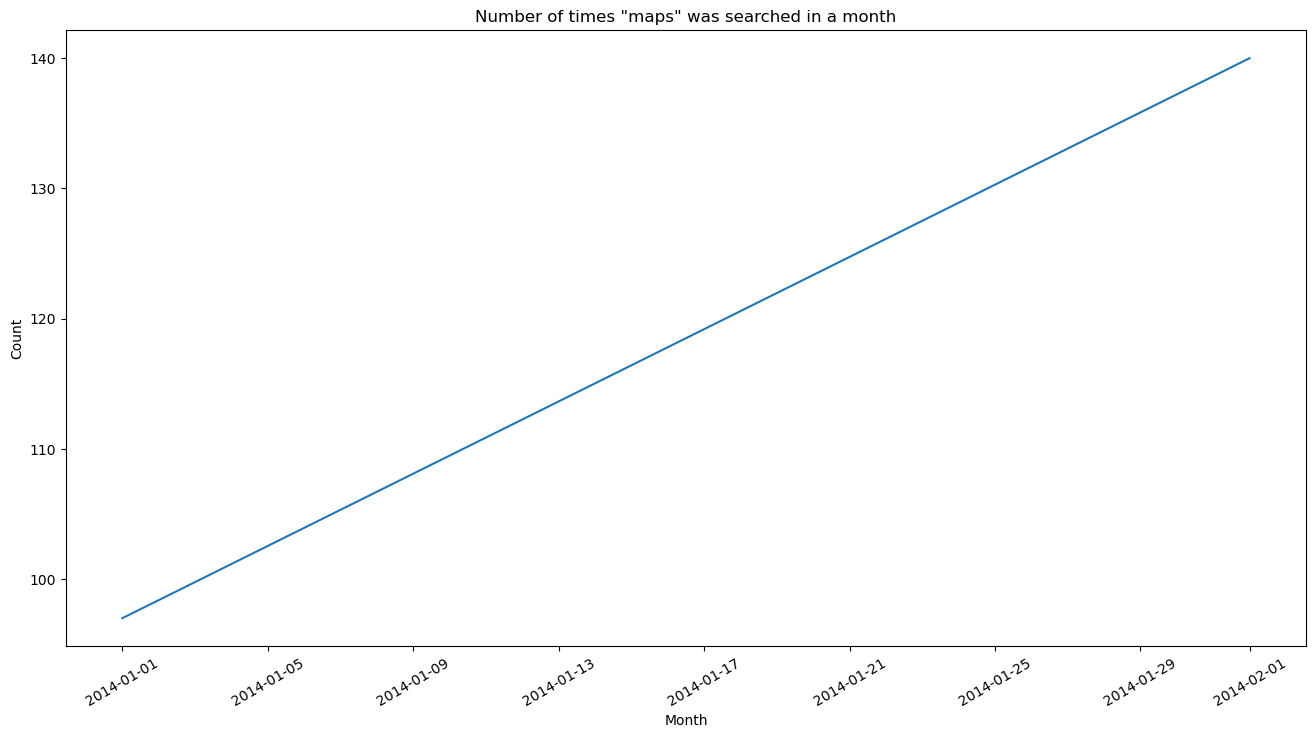

In [89]:
maps_dict = {}
for line in results:
    text = line.get('query_text')
    mon_yr = str(line.get('month_name')+', '+line.get('year'))
    count = line.get('query_count')
    if text == 'maps':
        maps_dict[mon_yr] = count
    
maps_df = pd.DataFrame.from_dict(maps_dict, orient='index')
maps_df = maps_df.reset_index()
maps_df.columns = ['date', 'count']
maps_df['count'] = maps_df['count'].astype(float)
maps_df['date'] = pd.to_datetime(maps_df['date'])
maps_df['mon_yr'] = maps_df['date'].dt.strftime('%m/%Y')
maps_df = maps_df.sort_values('date')

plt.figure(figsize=(16, 8))
plt.plot(maps_df['date'], maps_df['count'])
plt.xticks(rotation=30)
plt.title('Number of times "maps" was searched in a month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


